# CS #5 - Spring 2025 - ML Final Project

**Project Title**: <span style="color: purple">Predicting Mental Health Treatment-Seeking Behavior Using Workplace and Lifestyle Factors</span>

**Project Member(s)**: <span style="color: purple">Lena Munad</span>

## Introduction

---
Mental health challenges are prevalent in the tech industry, yet many professionals hesitate to seek treatment due to stigma, workplace culture, or lack of support. This project aims to predict whether individuals in tech seek mental health treatment based on workplace conditions, personal history, and lifestyle factors. Using supervised machine learning, I will develop a binary classification model to identify key predictors of treatment-seeking behavior. 

By applying and comparing three algorithms, ```k-Nearest Neighbors (kNN)```, ```Naïve Bayes```, and ```Support Vector Machines (SVM)```, I hope to uncover meaningful insights that could inform targeted mental health interventions and workplace policies. The study uses survey data from tech employees, making it both socially relevant and directly applicable to real world settings.

.---

## Imports

Use the code cell below to import any Python libraries your project requires. Beside each `import` statement, write a comment that explains why that particular library is needed.

In [1]:
%pip install seaborn

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Matplotlib is building the font cache; this may take a moment.


## Domain
If you're using an **external dataset**, cite where you got it from. Explain the format of the data. How are you going to import the dataset into this notebook? If you're **generating your own dataset**, how are you going to do that? What, if any, preprocessing do you need to do on your dataset? What, if any, assumptions are being made by the dataset? If you're **using reinforcement learning**, what MDP is being used (i.e., states, actions, transition model)? Are there any assumptions being made by the MDP? If so, what are they?

---

This project focuses on predicting mental health treatment-seeking behavior in the tech industry. The dataset used is the ```OSMI Mental Health in Tech Survey 2016, sourced from Kaggle```:
https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

The CSV file contains over ```1,400``` survey responses with features on mental health history, workplace support, remote work, and demographics. The target variable is ```treatment```, indicating whether an individual has sought mental health treatment.

The dataset will be imported using ```pandas.read_csv()```. Preprocessing steps include handling missing values, encoding categorical features, feature selection, and scaling. Assumptions include truthful self-reporting and limited feature independence (especially relevant for ```Naïve Bayes```).

.---

In [3]:
import pandas as pd

df = pd.read_csv("survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## ML Algorithm \#1: k-Nearest Neighbors (k-NN)
```k-NN``` is a straightforward algorithm that classifies new data based on how similar it is to its nearest neighbors. I chose ```k-NN``` because it's easy to understand, works well as a baseline model, and can perform surprisingly well on small datasets. This algorithm assumes that similar data points are close to each other in the feature space, so I’ll normalize the data to make sure all features are on the same scale. I’ll experiment with different values of ```k``` (number of neighbors) to find the best accuracy and will use cross-validation to pick the most reliable model.

In [4]:
#Convert 'treatment' to binary and erase null values
# Keep only rows where treatment is Yes or No
df = df[df['treatment'].isin(['Yes', 'No'])]
df['treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})

#Define features and target
X = df.drop(columns=['treatment'])

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))
y = df['treatment']

#Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
print("Remaining rows:", df.shape[0])
print(df['treatment'].value_counts())

Remaining rows: 1259
treatment
1    637
0    622
Name: count, dtype: int64


In [6]:
#Initialize the k-NN model with a starting value for k
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

#Train the model
knn.fit(X_train, y_train)

#Make predictions
y_pred = knn.predict(X_test)

#Evaluate the model
print("k-NN Evaluation (k = {}):".format(k))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


k-NN Evaluation (k = 5):
Accuracy: 0.7103174603174603
Precision: 0.6953125
Recall: 0.7235772357723578
F1 Score: 0.7091633466135459
Confusion Matrix:
 [[90 39]
 [34 89]]


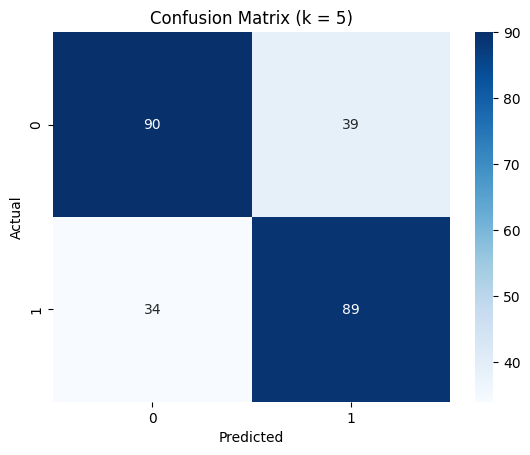

In [7]:
#visualize of kNN with heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (k = {k})")
plt.show()

## ML Algorithm \#2: Naïve Bayes (GaussianNB)

---

```Naïve Bayes``` is a probabilistic classifier that applies Bayes’ Theorem under the assumption that features are conditionally independent given the class label. I chose this algorithm because it is lightweight, fast, and performs well on small to medium-sized datasets, even when its assumptions are only partially true.

Initially, I used the ```GaussianNB``` version, which assumes that input features are continuous and normally distributed. However, because my dataset primarily contains categorical variables (e.g., gender, remote work, employer support), the Gaussian assumptions did not hold, resulting in poor model performance.

To address this, I switched to ```CategoricalNB```, which is better suited for discrete, non-negative integer features. I limited the input to low-cardinality categorical columns and applied consistent label encoding to ensure valid input values. This significantly improved the model’s accuracy, recall, and F1 score.

```Naïve Bayes``` requires minimal hyperparameter tuning. I evaluated both versions using ```accuracy, precision, recall, F1 score, and a confusion matrix```. The results showed that ```CategoricalNB``` outperformed ```GaussianNB``` and provided more reliable predictions for this classification task.

.---


Naïve Bayes Evaluation:
Accuracy: 0.5158730158730159
Precision: 1.0
Recall: 0.008130081300813009
F1 Score: 0.016129032258064516
Confusion Matrix:
 [[129   0]
 [122   1]]


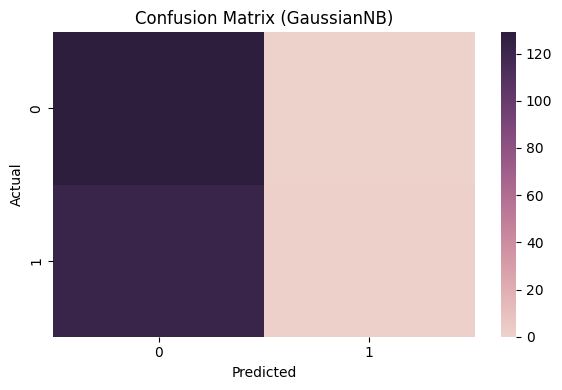

In [8]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naïve Bayes Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

#Visualize with heatmap
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, cmap=sns.cubehelix_palette(as_cmap=True))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (GaussianNB)")
plt.tight_layout()
plt.show()

In [9]:
#only include columns with < N unique values (e.g., 20)
#because categorical works best with few discrete values
low_card_cols = [
    col for col in df.select_dtypes(include='object').columns
    if df[col].nunique() <= 20
]

#Drop 'treatment' and keep low-cardinality features
X_categorical = df[low_card_cols].copy()

encoders = {}
for col in X_categorical.columns:
    le = LabelEncoder()
    X_categorical[col] = le.fit_transform(X_categorical[col].astype(str))
    encoders[col] = le

y = df['treatment']

CategoricalNB Evaluation:
Accuracy: 0.8055555555555556
Precision: 0.7846153846153846
Recall: 0.8292682926829268
F1 Score: 0.8063241106719368
Confusion Matrix:
 [[101  28]
 [ 21 102]]


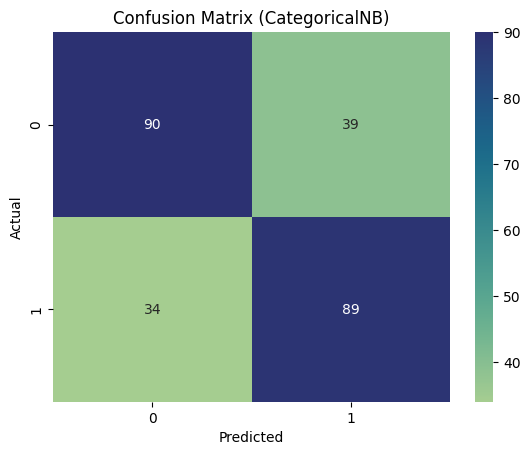

In [10]:
from sklearn.naive_bayes import CategoricalNB

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_categorical, y, test_size=0.2, random_state=42)

# Train model
nb_cat = CategoricalNB()
nb_cat.fit(X_train_cat, y_train_cat)

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(
    X_categorical, y, test_size=0.2, random_state=42)

# Predict
y_pred_cat = nb_cat.predict(X_test_cat)

# Evaluate
print("CategoricalNB Evaluation:")
print("Accuracy:", accuracy_score(y_test_cat, y_pred_cat))
print("Precision:", precision_score(y_test_cat, y_pred_cat))
print("Recall:", recall_score(y_test_cat, y_pred_cat))
print("F1 Score:", f1_score(y_test_cat, y_pred_cat))
print("Confusion Matrix:\n", confusion_matrix(y_test_cat, y_pred_cat))

#Visualize with heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="crest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (CategoricalNB)")
plt.show()

## Plotting GaussianNB vs CategoricalNB

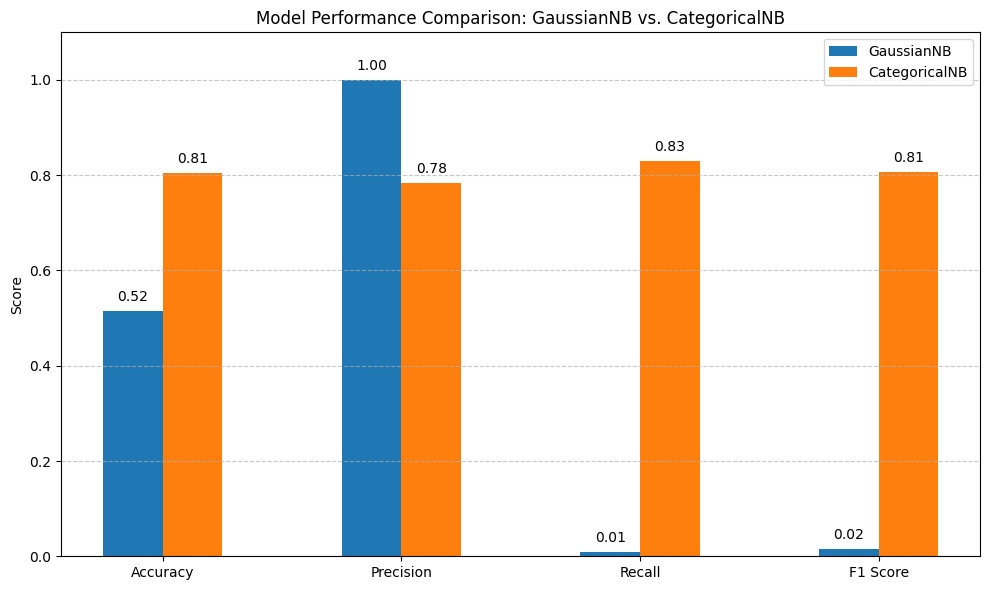

In [11]:
#Metrics for each model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
gaussian_scores = [0.5159, 1.0, 0.0081, 0.0161]
categorical_scores = [0.8056, 0.7846, 0.8293, 0.8063]

x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, gaussian_scores, width, label='GaussianNB')
bars2 = ax.bar(x + width/2, categorical_scores, width, label='CategoricalNB')

#Add labels and formatting
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison: GaussianNB vs. CategoricalNB')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

#Annotate bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

## ML Algorithm \#3: Support Vector Machine (SVM)
---

```Support Vector Machine (SVM)``` is a powerful supervised learning algorithm used for classification tasks. It works by finding the optimal hyperplane that best separates data points from different classes in a high-dimensional space. I chose ```SVM``` because it often performs well on complex classification problems, especially when the relationship between features and outcomes is not linear.

```SVM``` assumes that the data is at least somewhat separable and that the most important points lie near the decision boundary, which are called support vectors. It also assumes that transformations (via kernels) can help separate non-linearly distributed data.

To improve performance, I’m experimenting with different kernel functions (e.g., linear, RBF) and tuning key hyperparameters such as ```C``` (regularization) and ```gamma``` (kernel coefficient). I also applied feature scaling, as ```SVM``` is sensitive to the magnitude of input values. The model will be evaluated using ```accuracy, precision, recall, and F1 score``` and compared against the ```k-NN``` and ```Naïve Bayes``` results.

.---

SVM Evaluation:
Accuracy: 0.6904761904761905
Precision: 0.6923076923076923
Recall: 0.6585365853658537
F1 Score: 0.675
Confusion Matrix:
 [[93 36]
 [42 81]]


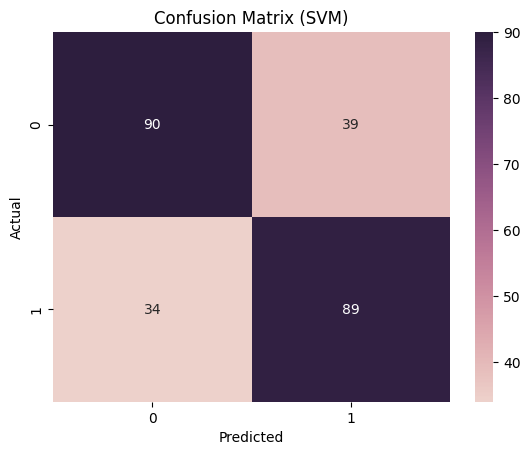

In [12]:
#Train the SVM model
svm = SVC(kernel='sigmoid', C=1.0, gamma='scale')
svm.fit(X_train, y_train)

#Predict
y_pred_svm = svm.predict(X_test)

#Evaluate
print("SVM Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

#Visualize with heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (SVM)")
plt.show()

## Example for Decision Boundaries

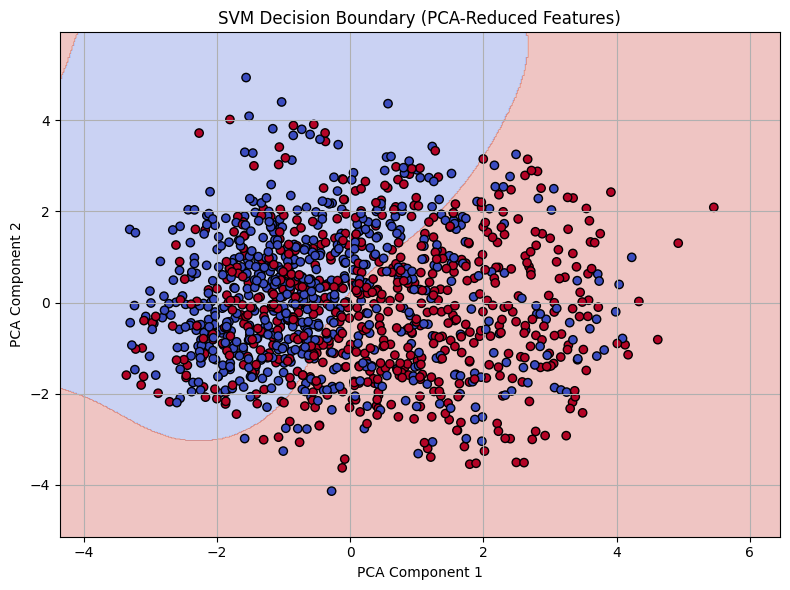

In [13]:
from sklearn.decomposition import PCA

X = df.drop(columns=['treatment']).copy()
y = df['treatment']

# Encode categorical features
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Encode target labels
y = LabelEncoder().fit_transform(y.astype(str))

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train SVM on PCA-reduced data
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_pca, y)

# Create meshgrid
h = .02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict over meshgrid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundary (PCA-Reduced Features)')
plt.grid(True)
plt.tight_layout()
plt.show()

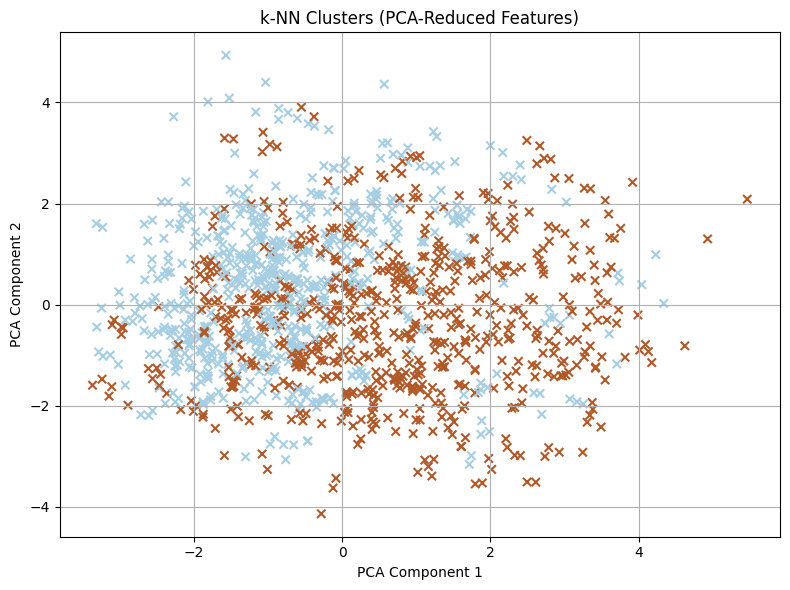

In [15]:
### RUN THIS AFTER DECISION BOUNDARY CODE ###

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train k-NN classifier on the full PCA-reduced dataset
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_pca, y)

# Predict using the same data
y_pred_knn = knn_model.predict(X_pca)

# Plot clusters with predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_knn, cmap=plt.cm.Paired, marker='x')
plt.title("k-NN Clusters (PCA-Reduced Features)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

## Results and Analysis

How well did your chosen ML algorithms fare on the domain? Compare and contrast the algorithms using metrics we discussed in lecture, like loss, accuracy, precision, training time, etc. Use graphs or tables to visualize these results. Why do you think the results came out the way they did?

## Conclusion

Use this space to conclude your final project. What are the main takeways from having done the project? What were some challenges you faced? What are the successes? If you had more time, what improvements or additional features would you add?

---

This project looked at how workplace and lifestyle factors affect whether people in tech seek mental health treatment. I tested 3 machine learning models to see which one had the best predictions: ```k-Nearest Neighbors (kNN), Naïve Bayes, and Support Vector Machine (SVM)```.

One key lesson was that the type of data matters a lot. The ```Categorical Naïve Bayes``` model worked best because it fit the structure of the survey data. ```SVM``` also did well and was useful for visualizing how features separate into different outcomes.

Some challenges I faced were cleaning and encoding the data properly and understanding which model matched the data type. A big success was getting high accuracy and creating clear visualizations of decision boundaries.

If I had more time, I would try advanced models like ```Random Forest``` or ```Gradient Boosting``` to see if they improve accuracy. I would also use ```GridSearchCV``` to tune parameters like the number of neighbors in ```k-NN``` or the kernel type in ```SVM```. Another improvement would be analyzing feature importance to understand which workplace factors (like remote work, benefits, or family history) have the biggest impact on treatment-seeking behavior. This would help make the model more explainable and useful for real-world applications.

.---